<a href="https://colab.research.google.com/github/Bhavani-Rajan/DS-Unit-2-Applied-Modeling/blob/master/module1/assignment_applied_modeling_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [x] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Choose which observations you will use to train, validate, and test your model. And which observations, if any, to exclude.
- [x] Determine whether your problem is regression or classification.
- [ ] Choose your evaluation metric.
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" information from the future?


### setup

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Frogs_MFCCs.csv to Frogs_MFCCs (1).csv


In [0]:
import pandas as pd

df = pd.read_csv('Frogs_MFCCs.csv')

In [4]:
df.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,MFCCs_11,MFCCs_12,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,-0.075622,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,-0.095004,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,-0.072827,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,-0.162258,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,-0.100749,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [6]:
df.dtypes

MFCCs_ 1    float64
MFCCs_ 2    float64
MFCCs_ 3    float64
MFCCs_ 4    float64
MFCCs_ 5    float64
MFCCs_ 6    float64
MFCCs_ 7    float64
MFCCs_ 8    float64
MFCCs_ 9    float64
MFCCs_10    float64
MFCCs_11    float64
MFCCs_12    float64
MFCCs_13    float64
MFCCs_14    float64
MFCCs_15    float64
MFCCs_16    float64
MFCCs_17    float64
MFCCs_18    float64
MFCCs_19    float64
MFCCs_20    float64
MFCCs_21    float64
MFCCs_22    float64
Family       object
Genus        object
Species      object
RecordID      int64
dtype: object

In [0]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
col_headers = ['class','cap-shape','cap-surface','cap-color',
               'bruises','odor','gill-attachment','gill-spacing',
              'gill-size','gill-color','stalk-shape','stalk-root',
              'stalk-surface-above-ring','stalk-surface-below-ring',
              'stalk-color-above-ring','stalk-color-below-ring',
              'veil-type','veil-color','ring-number','ring-type',
              'spore-print-color','population','habitat']

df = pd.read_csv(data_url,names=col_headers)

In [112]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [113]:
df.shape

(8124, 23)

In [114]:
df.describe(exclude='number').T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


     0. class : poisonous = p,
                edible = e   
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s	
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,     green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
                                  
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
                           
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d


### expand the data instead of single char


In [0]:
## dir
class_map = {'p': 0, 'e': 1}
bruises = {'t':1,'f':0 }
cap_shape = {'b':'bell','c':'conical','x':'convex','f':'flat','k':'knobbed',
             's':'sunken'}
cap_surface = {'f':'fibrous','g':'grooves','y':'scaly','s':'smooth'}
cap_color = {'n':'brown', 'b':'buff','c':'cinnamon','g':'gray',
             'r':'green','p':'pink','u':'purple','e':'red','w':'white',
             'y':'yellow'}
odor = {'a' : 'almond','l': 'anise','c':'creosote','y':'fishy','f':'foul',
       'm':'musty','n':'none','p':'pungent','s':'spicy'}
gill_attachment = {'a' : 'attached','d':'descending','f': 'free',
                   'n': 'notched'}
gill_spacing={'c': 'close','w': 'crowded','d': 'distant'}
gill_size={'b':'broad','n':'narrow'}
gill_color={'k':'black','n':'brown', 'b':'buff','h':'chocolate','g':'gray',
             'r':'green','o':'orange','p':'pink','u':'purple','e':'red',
            'w':'white', 'y':'yellow'}
stalk_shape = {'e':'enlarging','t': 'tapering'}
stalk_root = {'b':'bulbous','c':'club','u':'cup','e':'equal',
             'z': 'rhizomorphs','r': 'rooted','?': 'missing'}



In [0]:


df['class'] = df['class'].map(class_map)
df['bruises'] = df['bruises'].map(bruises)
df['cap-shape'] = df['cap-shape'].map(cap-shape)
df['cap-surface'] = df['cap-surface'].map(cap-surface)
df['cap-color'] = df['cap-color'].map(cap-color)

In [0]:
y = df['class'] == 'e'
X = df.drop(columns='class')

In [152]:
y.describe()

count     8124
unique       2
top       True
freq      4208
Name: class, dtype: object

In [153]:
y.value_counts()

True     4208
False    3916
Name: class, dtype: int64

In [154]:
y.value_counts(normalize=True)

True     0.517971
False    0.482029
Name: class, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
          

In [156]:
y_train.value_counts(normalize=True)

True     0.517926
False    0.482074
Name: class, dtype: float64

In [157]:
y_test.value_counts(normalize=True)

True     0.518154
False    0.481846
Name: class, dtype: float64

#### baseline metrics

In [0]:
# Majority class baseline
y_pred = [True] * len(y_test)

In [165]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

print('accuracy score:')
print(accuracy_score(y_test, y_pred))

print('precision score:')
print(precision_score(y_test, y_pred))

print('recall score:')
print(recall_score(y_test, y_pred))

print('roc auc score:')
print(roc_auc_score(y_test, y_pred))

accuracy score:
0.5181538461538462
precision score:
0.5181538461538462
recall score:
1.0
roc auc score:
0.5


In [173]:
!pip install category_encoders==2.*

     |████████████████████████████████| 102kB 2.5MB/s 


In [177]:

import category_encoders as ce
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

pipe = make_pipeline(
    ce.OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=2)
)

scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
print('Validation ROC AUC:', scores)

Validation ROC AUC: [0.98165869 0.97462385 0.97381337 0.97738537 0.97128161]


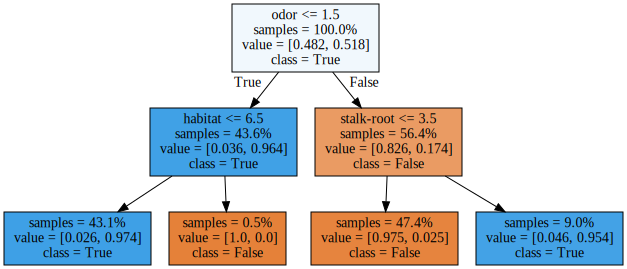

In [178]:
import graphviz
from sklearn.tree import export_graphviz

pipe.fit(X_train, y_train)
tree = pipe.named_steps['decisiontreeclassifier']
encoder = pipe.named_steps['ordinalencoder']
feature_names = encoder.transform(X_train).columns
feature_names[tree.feature_importances_ > 0]

dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=feature_names, class_names=['False', 'True'], 
                           filled=True, impurity=False, proportion=True)

graphviz.Source(dot_data)

In [103]:
import numpy as np
df.replace(to_replace ='?', value =np.nan) 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,convex,smooth,brown,1,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,1,convex,smooth,yellow,1,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,1,bell,smooth,white,1,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,0,convex,scaly,white,1,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,1,convex,smooth,gray,0,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,1,convex,scaly,yellow,1,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,1,bell,smooth,white,1,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,1,bell,scaly,white,1,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,0,convex,scaly,white,1,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,1,bell,smooth,yellow,1,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


In [100]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,convex,smooth,brown,1,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,1,convex,smooth,yellow,1,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,1,bell,smooth,white,1,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,0,convex,scaly,white,1,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,1,convex,smooth,gray,0,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [108]:
df.describe(include='number')

,class,bruises
count,8124.000000,8124.000000
mean,0.517971,0.415559
std,0.499708,0.492848
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [110]:
df.describe(exclude='number').T

,count,unique,top,freq
cap-shape,8124,6,convex,3656
cap-surface,8124,4,scaly,3244
cap-color,8124,10,brown,2284
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728
stalk-shape,8124,2,t,4608
stalk-root,8124,5,b,3776


In [101]:
df.dtypes


class                        int64
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                      int64
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [0]:
df_edible = df[df['class'] == 1]
df_poisonous = df[df['class'] == 0]

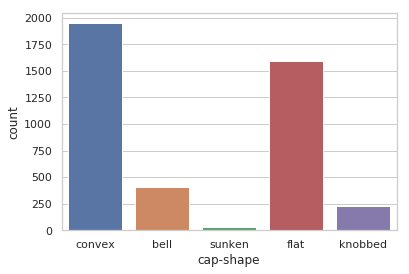

In [83]:
import seaborn as sns
sns.countplot(x="cap-shape", data=df_edible);
                

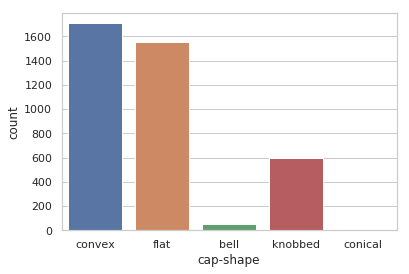

In [86]:
import seaborn as sns
sns.countplot(x="cap-shape", data=df_poisonous);

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


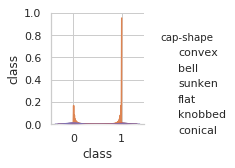

In [87]:
sns.pairplot(df, hue="cap-shape", height=2.5);